# Atividade Prática 2.1 - Cobertura Florestal

* Disciplina _Inteligência Artificial Aplicada_
* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)
* Data de apresentação: 26 de janeiro de 2024
* Data limite de entrega: 01 de fevereiro de 2024


## Equipe
* Integrante 1: *Aurelio Aquino*
* Integrante 2: *Jailson Bina*
* Integrante 3: *Sthephany Costa*
* Integrante 4: *Erica Veras*
* Integrante 5: *Michelle de Carvalho*
* Integrante 6: *Fabiano Dolzanes*


## Contexto: Cobertura Florestal

Este conjunto de dados contém observações de árvores de quatro áreas da Floresta Nacional de Roosevelt, no Colorado. Todas as observações são variáveis cartográficas (sem sensoriamento remoto) de seções de floresta de 30 metros por 30 metros. Há mais de meio milhão de medições no total

## Base de Dados

Disponível em: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

/tmp/ipykernel_3431/4098474455.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Abertura do Dataset

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [2]:
df = pd.read_csv('covtype2 - covtype2.csv')

### Análise Exploratória

1. Quantos exemplos há no dataset?
2. Quais os atributos existentes no dataset?
3. O atributo alvo é Cover_Type. A distribuição de classes no mesmo é uniforme?

In [3]:
len(df)

10000

In [4]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
df['Cover_Type'].value_counts()

Cover_Type
4    1620
5    1583
2    1462
1    1375
7    1349
6    1349
3    1262
Name: count, dtype: int64

### Organização dos dados para treinamento

1. Remova os dados faltantes
2. Remova a coluna Cover_Type e atribua-a a uma variável Y
3. Atribua os demais valores do dataset a uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn

In [6]:
df = df.dropna()

In [7]:
X = df.drop(columns=['Cover_Type'])

In [8]:
Y = df['Cover_Type']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Treinamento de uma RNA MLP para o problema

1. Treine uma RNA MLP Classificadora para este problema com uma única camada e 10 neurônios  
    1.1 Utilize a função de ativação ReLU  
    1.2 Utilize o solver Adam    
    1.3 Imprima o passo a passo do treinamento    
    1.4 Utilize o número máximo de épocas igual a 100 

In [10]:
modelo = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', verbose=True, max_iter=100)

In [11]:
modelo.fit(X_train, Y_train)

Iteration 1, loss = 28.75798744
Iteration 2, loss = 28.15027347
Iteration 3, loss = 24.65905129
Iteration 4, loss = 20.87820804
Iteration 5, loss = 17.68307454
Iteration 6, loss = 15.64073961
Iteration 7, loss = 13.44372245
Iteration 8, loss = 10.94367479
Iteration 9, loss = 8.82584188
Iteration 10, loss = 7.13809375
Iteration 11, loss = 6.27501222
Iteration 12, loss = 5.58307272
Iteration 13, loss = 5.06982164
Iteration 14, loss = 4.54717230
Iteration 15, loss = 4.18041335
Iteration 16, loss = 4.06990703
Iteration 17, loss = 3.74598221
Iteration 18, loss = 3.40806924
Iteration 19, loss = 3.19722676
Iteration 20, loss = 2.94745138
Iteration 21, loss = 2.67926037
Iteration 22, loss = 2.56095942
Iteration 23, loss = 2.37208258
Iteration 24, loss = 2.43522775
Iteration 25, loss = 2.21696374
Iteration 26, loss = 1.92963925
Iteration 27, loss = 1.83368937
Iteration 28, loss = 1.71432249
Iteration 29, loss = 1.74976568
Iteration 30, loss = 1.59548773
Iteration 31, loss = 1.53782592
Iteration

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, verbose=True)

## Aferição de Desempenho

2. Com o modelo em questão, após o treinamento, apresente:  
    2.1 Matriz de confusão para o conjunto de teste  
    2.2 Acurácia  
    2.3 F-Score Balanceado  
    2.4 Precisão  
    2.5 Revocação 

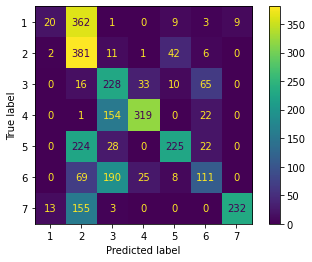

In [12]:
Y_prev = modelo.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_prev)

In [13]:
accuracy_score(Y_test, Y_prev)

0.5053333333333333

In [14]:
f1_score(Y_test, Y_prev, average='macro')

0.48477447437559257

In [15]:
precision_score(Y_test, Y_prev, average='macro')

0.6163072649954767

In [16]:
recall_score(Y_test, Y_prev, average='macro')

0.5003487085938422

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 75, 100] e [10, 15], tem-se que a grade é [(50,10), (50,15), (75,10), (75,15), (100,10), (100,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [17]:
neuron1 = [50, 75, 100]
neuron2 = [10, 15]

neurons = []
for i in neuron1:
  for j in neuron2:
    neurons.append((i,j))

neurons

[(50, 10), (50, 15), (75, 10), (75, 15), (100, 10), (100, 15)]

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
parameters = {
    'hidden_layer_sizes': neurons,
    'activation': ['identity', 'logistic', 'tahn', 'relu'],
    'solver': ['adam', 'lbfgs', 'sqd']
}
# Utilizando k-fold padrão de 5
# Total de 360 fits
searcher = GridSearchCV(MLPClassifier(), parameters, verbose=True)

In [20]:
searcher.fit(X_train, Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNS

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tahn', 'relu'],
                         'hidden_layer_sizes': [(50, 10), (50, 15), (75, 10),
                                                (75, 15), (100, 10),
                                                (100, 15)],
                         'solver': ['adam', 'lbfgs', 'sqd']},
             verbose=True)

In [21]:
searcher.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (100, 10), 'solver': 'adam'}